In [2]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [5]:
df_heart = pd.read_csv('../inputs/heart.csv')
print(df_heart['target'].value_counts())
X = df_heart.drop(['target'], axis=1)
y = df_heart['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Con cross validation podemos optimizar la cantidad de estimadores que deberiamos utilizar
boost = GradientBoostingClassifier(n_estimators=50)
boost.fit(X_train, y_train)
boost_pred = boost.predict(X_test)
print('=' * 64)
print('GradientBoostingClassifier accuracy :', accuracy_score(boost_pred, y_test))

target
1    526
0    499
Name: count, dtype: int64
GradientBoostingClassifier accuracy : 0.948051948051948


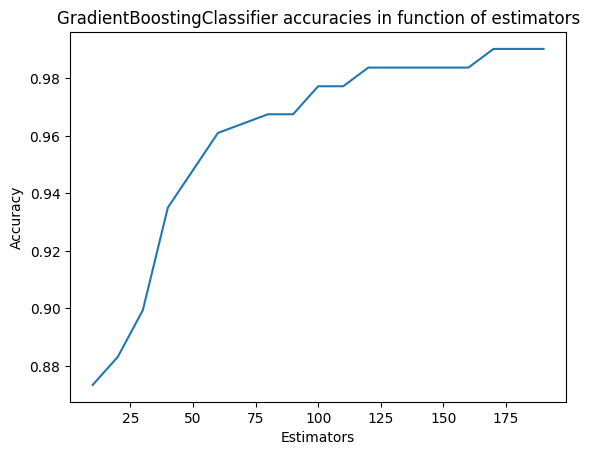

0.9902597402597403


In [6]:
estimators = range(10, 200, 10)
total_accuracy = []
for i in estimators:
    boost = GradientBoostingClassifier(n_estimators=i)
    boost.fit(X_train, y_train)
    boost_pred = boost.predict(X_test)
    total_accuracy.append(accuracy_score(y_test, boost_pred))

plt.plot(estimators, total_accuracy)
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.title('GradientBoostingClassifier accuracies in function of estimators')
plt.savefig("boosting_results.png")
plt.show()
print(np.array(total_accuracy).max())

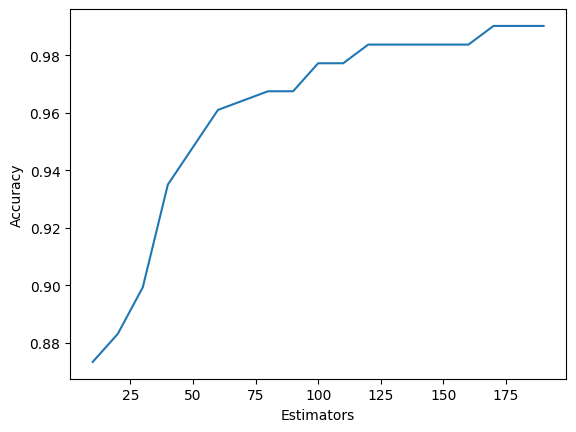

170


<Figure size 640x480 with 0 Axes>

In [ ]:
# Modifiqué tu código para que podamos obtener cuanto es el menor número de estimadores que se necesita para lograr la máxima precisión posible.

estimators = range(10, 200, 10)
total_accuracy = {}
for i in estimators:
    boost = GradientBoostingClassifier(
        n_estimators=i).fit(X_train, y_train)
    boost_pred = boost.predict(X_test)

    total_accuracy[i] = accuracy_score(y_test, boost_pred)

plt.plot(estimators, total_accuracy.values())
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.show()
plt.savefig('Boost.png')

max_accu = np.array(list(total_accuracy.values())).max()
best_est_num = {k: v for k, v in total_accuracy.items()
                if v == max_accu}
best_est_num = list(best_est_num)
print(best_est_num[0])